# Sprint M3
Karen Tapia

1) crear el siguiente DataFrame indexado


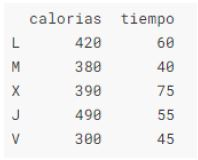

In [7]:
import pandas as pd #se importan las librerias pandas
datos= {'calorias': [420, 380, 390, 490, 300], #se ingresa el dataframe con los datos del ejercicio
        'tiempo':[60, 40, 75, 55, 45]}
df = pd.DataFrame(datos, index=['L','M','X','J','V'])#se agrega al DataFrame los dias de la semana, como indice
display(df)

,calorias,tiempo
L,420,60
M,380,40
X,390,75
J,490,55
V,300,45


2) Calcular la media, mediana, y desviacion tipica de ambas columnas

In [16]:
media = df.mean() #se define la variable y la funcion para el calculo de la media
mediana = df.median() #se define la variable y la funcion para el calculo de la mediana
desviacion = df.std()#se define la variable y la funcion para el calculo de la desviacion

calculos=pd.concat([media, mediana, desviacion], axis =1) #se une al diccionario el resultado de la media, mediana y desviacion
calculos.columns = ['media', 'mediana','desviacionn'] #se agrega la columna con los titulos de los indicadores de la media, la mediana y la desviacion
print(calculos) #desglosa la tabla con los resultados


          media  mediana  desviacionn
calorias  396.0    390.0    68.774995
tiempo     55.0     55.0    13.693064
reto        0.0      0.0     0.000000


3) Añadir otra columna booleana al DataFrame, para ver si se ha cumplido el reto de quemar mas de 400 calorias por hora. La nueva columna debe generarse aplicando una formula a otras columnas.

In [18]:
"""
import pandas as pd
datos = {'calorias':[420, 380, 390, 490, 300], 'tiempo': [60, 40, 75, 55, 45]}
df = pd.DataFrame(datos, index=['L', 'M', 'X', 'J', 'V'])
datos de referencia
"""
#se crea la fila reto, que almacena el calculo y despliega un valor booleano
df['reto'] = (df['calorias'] / df['tiempo']) > 400 / 60
display(df) #despliega la tabla con los datos solicitados


,calorias,tiempo,reto
L,420,60,True
M,380,40,True
X,390,75,False
J,490,55,True
V,300,45,False


4) Filtrar el DataFrame

y devolver otro DataFrame con las filas pares que cumplan que el numero de calorias es mayor de 400

In [13]:
"""
import pandas as pd
datos={'calorias': [420, 380, 390, 490, 300],
      'tiempo':[60, 40, 75, 55, 45]}

df = pd.DataFrame(datos, index=['L','H', 'X', 'J', 'V'])
df=['cumple_reto']=df['calorias']/df['tiempo'] > 400/60
referencias
"""
#Filtrar el DataFrame original
df_filtrado=df.iloc[::2][(df['calorias'] > 400)]#funcion que busca en la fila de calorias la que sea mayor a 400

#mostrar el DataFrame filtrado
display(df_filtrado) #despliega tabla con el resultado de las filas con mayor calorias que 400



<ipython-input-13-32d52b79a8ea>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado=df.iloc[::2][(df['calorias'] > 400)]


,calorias,tiempo,reto
L,420,60,False


5) Crear a partir del DataFrame una serie con los porcentajes de dias que se ha conseguido reto y los que no

In [12]:
#contar con los dias
#se divide el DataFrame, la fila reto, para realizar de forma individual el calculo
df2=df.groupby(['reto']).count()

#redefinir el index
#se crea indice para Dataframe dividido
df2.index = df2.index.map({True: 'Cumplidos', False: 'no cumplidos'})

#formula para calculo de porcentaje, en relacion a las calorias
df2['%'] = 100 * df2['calorias'] / df2['calorias'].sum()

#variable almacena el resultado del calculo del porcentaje
serie_porcentajes = df2['%']

#depliega la tabla con los resultados
display(serie_porcentajes)

reto
no cumplidos    100.0
Name: %, dtype: float64

6) Crear un grafico como el de mas abajo que muestre la progresion de las calorias y tiempo durante la semana

Importacion de la libreria pyplot

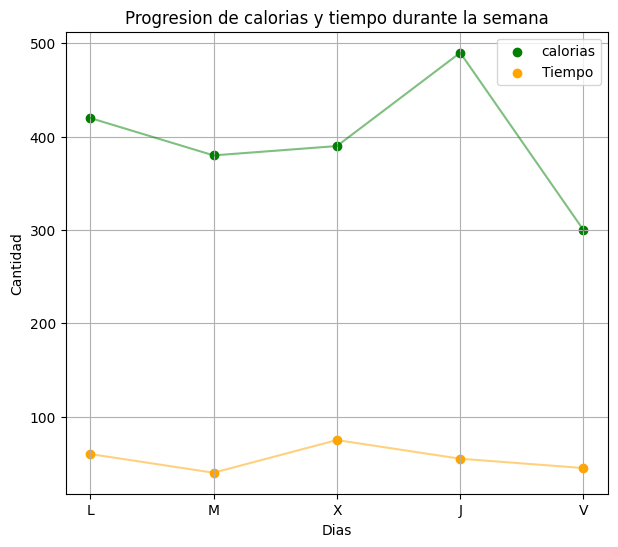

In [22]:
import matplotlib.pyplot as plt #libreria pyplot

#se crean las variables con los datos anteriores
dias= df.index
calorias = df['calorias']
tiempo=df['tiempo']

#crear el grafico de dispercion con dos curvas
plt.figure(figsize=(7,6)) #se determina el tamaño del grafico
plt.scatter(dias, calorias, color='green', label='calorias') #se determina la linea relacionada dias/calorias de color verde
plt.plot(dias, calorias, color='green', alpha=0.5) #se determina el grosor de la linea
plt.scatter(dias,tiempo,color='orange',label='Tiempo')  #se determina la linea relacionada de dias/tiempo, color naranjo
plt.plot(dias, tiempo, color ='orange', alpha=0.5)  #se determina el grosor de la linea
#personalizar el grafico
plt.title('Progresion de calorias y tiempo durante la semana') #se integra titulo explicativo del grafico
plt.xlabel('Dias') #se define en el eje x los dias
plt.ylabel('Cantidad') #se define en el eje y la cantidad
plt.legend()#muestra la leyenda del grafico
plt.grid(True)#muestra la grilla del grafico, los puntos de los vertices, para representar mejor
#mostrar el grafico
plt.show()